In [101]:
#As per - https://www.kaggle.com/code/faridrizqis/hertdisease-eda-prediction
# Dimensionality Reduction - https://www.kaggle.com/code/mahmoudlimam/undersampling-dimensionality-reduction
# Over/Under Sampling - https://www.kaggle.com/code/mahmoudlimam/resampling-tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math


In [86]:
df = pd.read_csv('../data/heart_disease_health_indicators_BRFSS2021.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236808 entries, 0 to 236807
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   HeartDiseaseOrAttack         236808 non-null  float64
 1   HighBP                       236808 non-null  float64
 2   HighChol                     236808 non-null  float64
 3   CholCheckLast5Years          236808 non-null  float64
 4   BMI                          236808 non-null  float64
 5   Smoker                       236808 non-null  float64
 6   Stroke                       236808 non-null  float64
 7   Diabetes                     236808 non-null  float64
 8   PhysActivityLast30Days       236808 non-null  float64
 9   FruitsPerDay                 236808 non-null  float64
 10  DarkGreensPerDay             236808 non-null  float64
 11  PotatoesPerDay               236808 non-null  float64
 12  OtherVegPerDay               236808 non-null  float64
 13 

In [73]:
df.isnull().sum()

HeartDiseaseOrAttack           0
HighBP                         0
HighChol                       0
CholCheckLast5Years            0
BMI                            0
Smoker                         0
Stroke                         0
Diabetes                       0
PhysActivityLast30Days         0
FruitsPerDay                   0
DarkGreensPerDay               0
PotatoesPerDay                 0
OtherVegPerDay                 0
HeavyDrinker                   0
AnyHealthcare                  0
CantAffordHealthcare           0
GeneralHealth                  0
BadMentalHealthLast30Days      0
BadPhysicalHealthLast30Days    0
DiffWalking                    0
Sex                            0
AgeGroup                       0
HighestEducation               0
IncomeGroup                    0
State                          0
HighBPMeds                     0
CholMeds                       0
DiabetesAge                    0
dtype: int64

In [74]:
df.columns

Index(['HeartDiseaseOrAttack', 'HighBP', 'HighChol', 'CholCheckLast5Years',
       'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivityLast30Days',
       'FruitsPerDay', 'DarkGreensPerDay', 'PotatoesPerDay', 'OtherVegPerDay',
       'HeavyDrinker', 'AnyHealthcare', 'CantAffordHealthcare',
       'GeneralHealth', 'BadMentalHealthLast30Days',
       'BadPhysicalHealthLast30Days', 'DiffWalking', 'Sex', 'AgeGroup',
       'HighestEducation', 'IncomeGroup', 'State', 'HighBPMeds', 'CholMeds',
       'DiabetesAge'],
      dtype='object')

In [75]:
df.sample(5)

,HeartDiseaseOrAttack,HighBP,HighChol,CholCheckLast5Years,BMI,Smoker,Stroke,Diabetes,PhysActivityLast30Days,FruitsPerDay,...,BadPhysicalHealthLast30Days,DiffWalking,Sex,AgeGroup,HighestEducation,IncomeGroup,State,HighBPMeds,CholMeds,DiabetesAge
16555,0.0,0.0,0.0,1.0,21.87,1.0,0.0,0.0,1.0,1.00,...,0.0,0.0,1.0,2.0,5.0,7.0,6,0.0,0.0,0.0
157929,0.0,0.0,0.0,1.0,29.12,0.0,0.0,0.0,1.0,3.00,...,0.0,0.0,0.0,7.0,6.0,9.0,37,0.0,0.0,0.0
28095,0.0,1.0,0.0,1.0,25.75,0.0,0.0,0.0,1.0,3.00,...,0.0,0.0,0.0,10.0,6.0,9.0,9,1.0,0.0,0.0
63954,0.0,1.0,1.0,1.0,27.44,1.0,0.0,0.0,1.0,0.29,...,1.0,0.0,0.0,9.0,4.0,7.0,20,1.0,1.0,0.0
51372,0.0,0.0,1.0,1.0,27.37,0.0,0.0,2.0,1.0,1.00,...,10.0,1.0,0.0,8.0,6.0,9.0,18,0.0,0.0,42.0


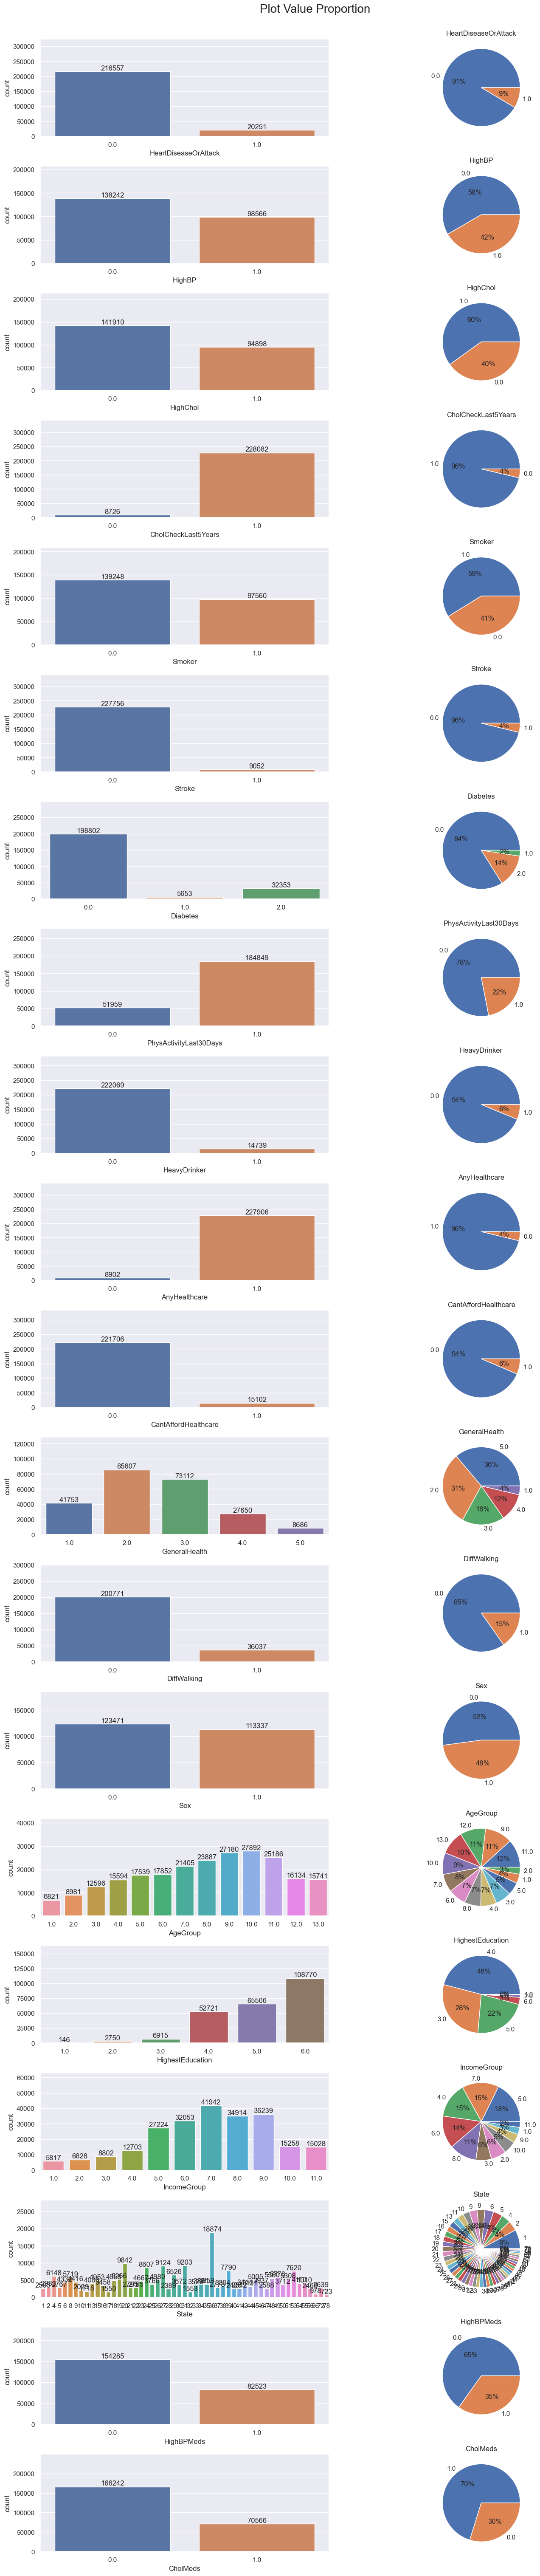

In [76]:
nonCatCol = ['DiabetesAge', 'FruitsPerDay', 'DarkGreensPerDay', 'PotatoesPerDay', 'OtherVegPerDay', 'BadMentalHealthLast30Days', 'BadPhysicalHealthLast30Days', 'BMI']

#Categorical

catcol = [x for x in df.columns if x not in nonCatCol]

plt.figure(figsize=(15,120))
for i,column in enumerate(catcol):
    plt.subplot(len(2*catcol), 2, (2*i)+1)
    plt.suptitle("Count Categorical Data", fontsize=20, x=0.5, y=1)

    ax = sns.countplot(data=df, x=column)
    ax.bar_label(ax.containers[0])
    ax.margins(y=0.5)

    plt.subplot(len(2*catcol), 2, (2*i)+2)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')

    plt.title(f"{column}")
    plt.tight_layout()

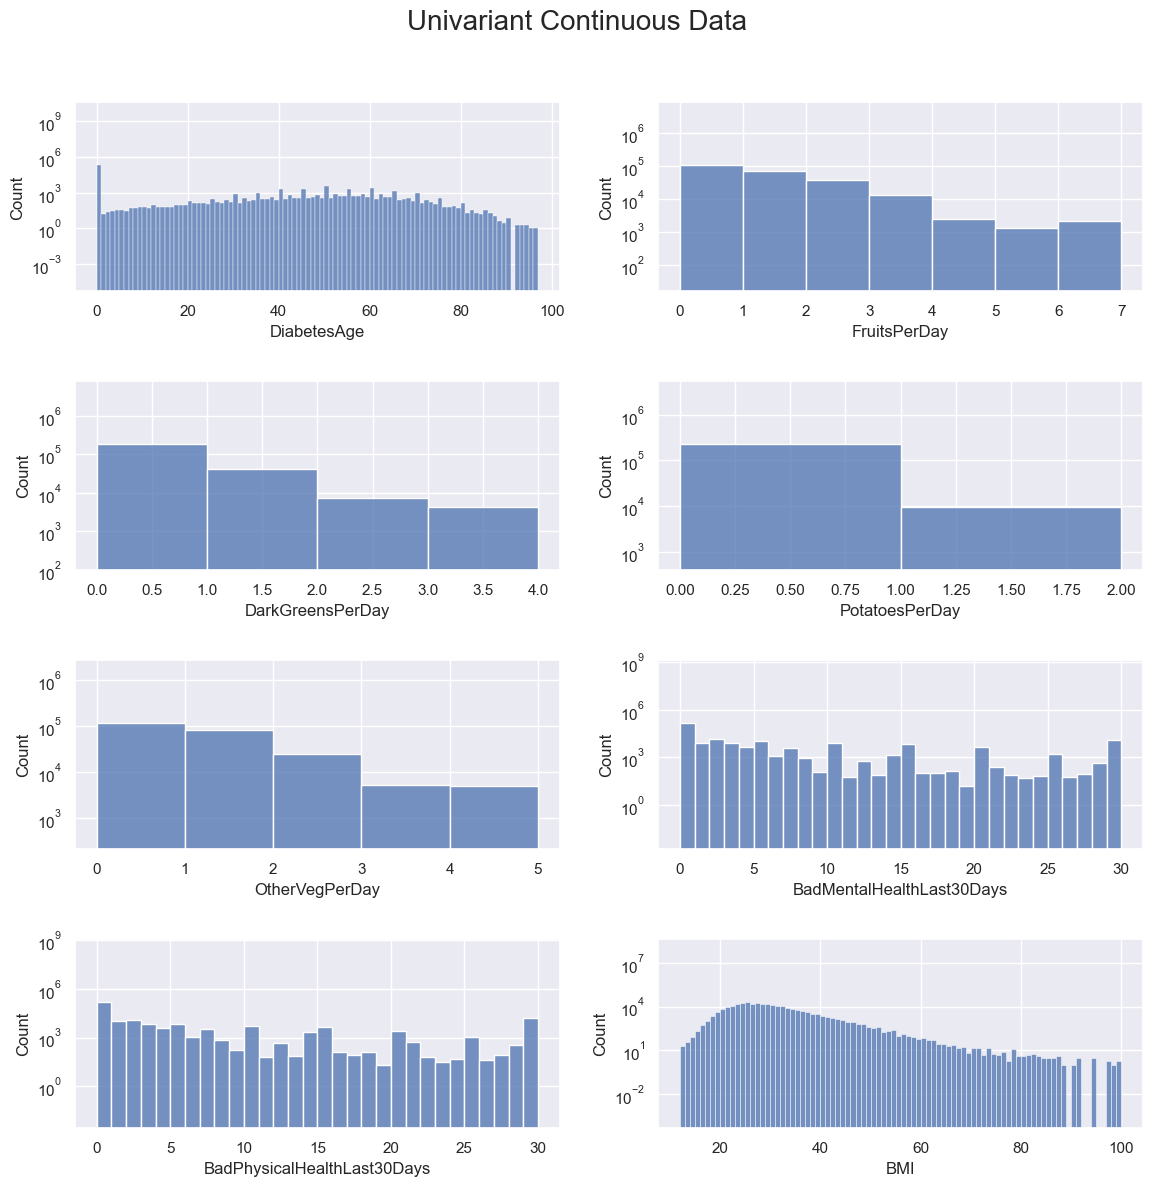

In [77]:
#Non-Categorical
plt.figure(figsize=(12,12))
for i,column in enumerate(nonCatCol):
    plt.suptitle("Univariant Continuous Data", fontsize=20, x=0.5, y=1)
    binwidth = 1

    plt.subplot(len(nonCatCol)//2, 2, i+1)
    data = df[column]

    plt.yscale("log")

    ax = sns.histplot(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))
    ax.margins(y=1)

    #plt.title(f"{column}")
    plt.tight_layout(pad=2.0)

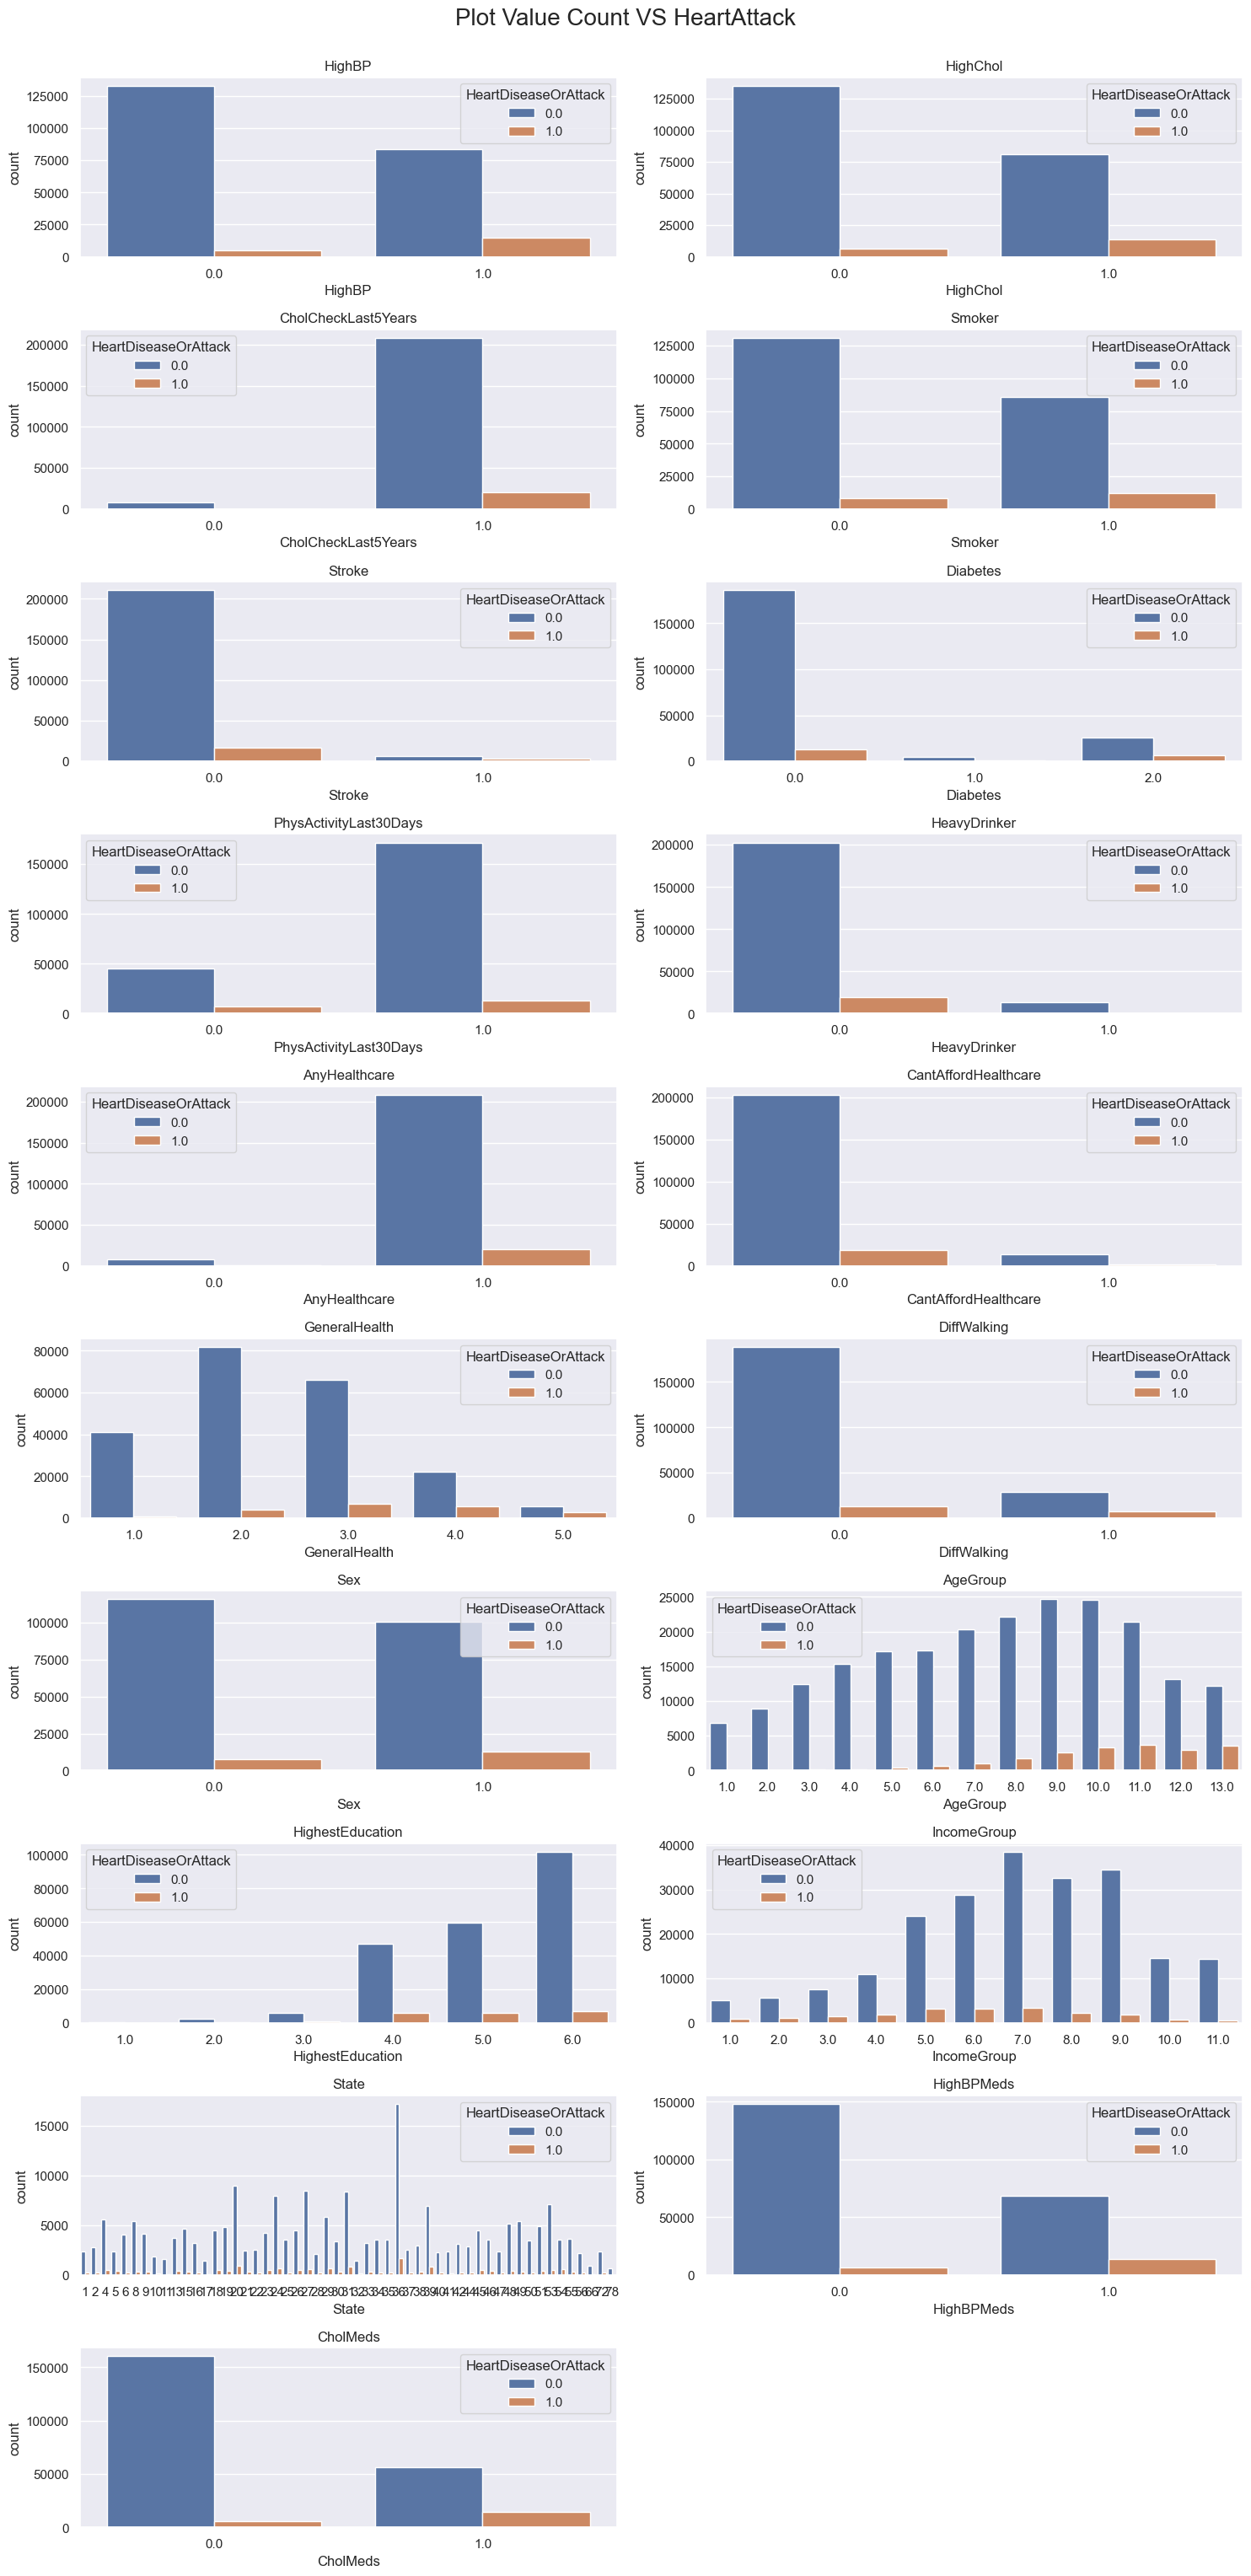

In [78]:
# Bi Variant
plt.figure(figsize=(15,60))
for i,column in enumerate(catcol[1:]):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, hue='HeartDiseaseOrAttack')
    plt.title(f"{column}")
    plt.tight_layout()

In [100]:
#From above we can see those with HeartDiseaseOrAttack have:
# - Use CholMeds More
# - Have HighBPMeds
# - Slightly more likely to be male
# - Are likely to be older
# - Are a smoker

In [104]:
#HeartDiseaseOrAttack to State

HeartDiseaseOrAttackByState = df.groupby('State')['HeartDiseaseOrAttack'].mean() * 100
HeartDiseaseOrAttackByState = pd.DataFrame({'State':HeartDiseaseOrAttackByState.index, 'Average':HeartDiseaseOrAttackByState.values})

fig = px.choropleth(HeartDiseaseOrAttackByState, locations=HeartDiseaseOrAttackByState['State'],
                    locationmode="USA-states",
                    scope="usa",
                    color=HeartDiseaseOrAttackByState['Average'])
fig.show()

<AxesSubplot: >

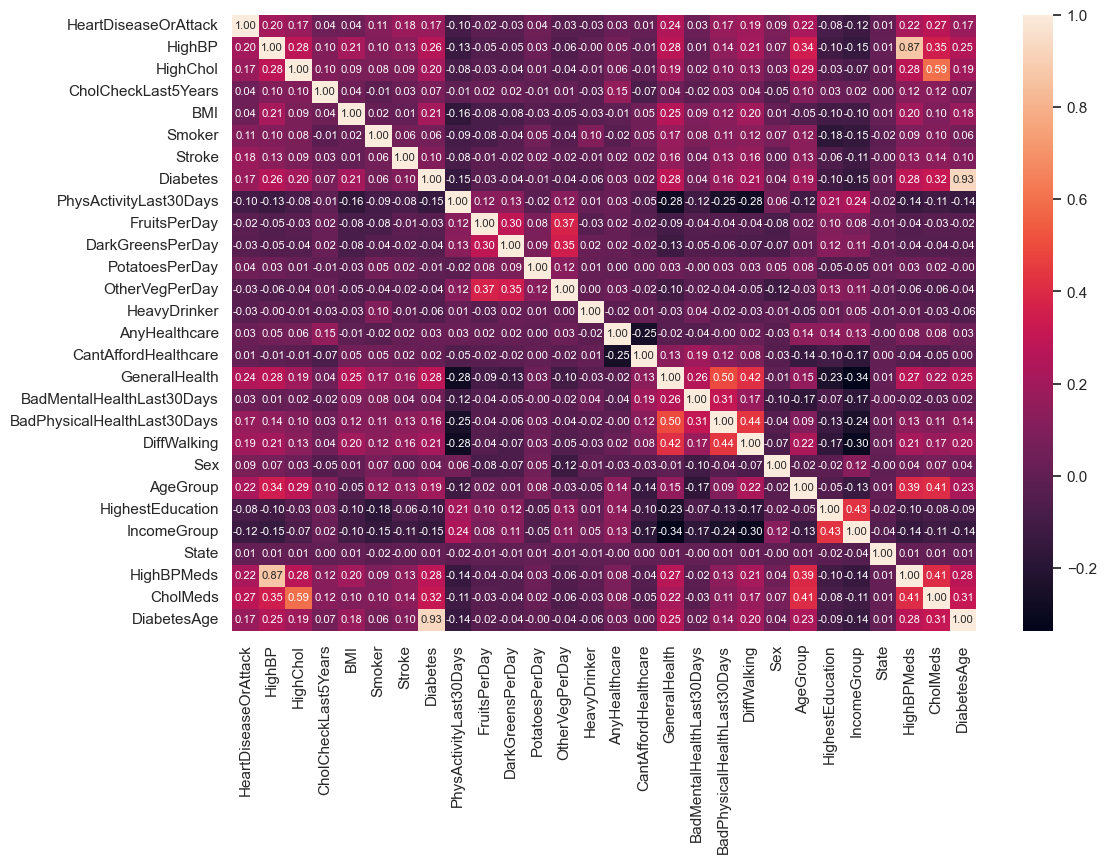

In [32]:
# Multi Variant Analysis
# Look at the correlation between variables

corr = df.corr()

sns.set(rc={"figure.figsize":(12, 8)}) #width=8, height=4

sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 8})#, cmap="Blues")#, annot=True)

In [20]:
# Looking at the above we can see:
# High correlation between (>= 0.5)
    # HighBP - High BP Meds
    # HighChol - CholMeds
    # Diabetes - Diabetes Age
    # GeneralHealth - BadPhysicalHealthLast30Days
# Slight negative correlation (<= 0.25)
    #PhysicalActivityLast30Days - DiffWalking
    #PhysicalActivityLast30Days - BadPhysicalHealthLast30Days
    #PhysicalActivityLast30Days - GeneralHealth
    #AnyHealthcare - CanAffordHealthcare
    #GeneralHealth - IncomeGroup
    #DiffWalking - IncomeGroup

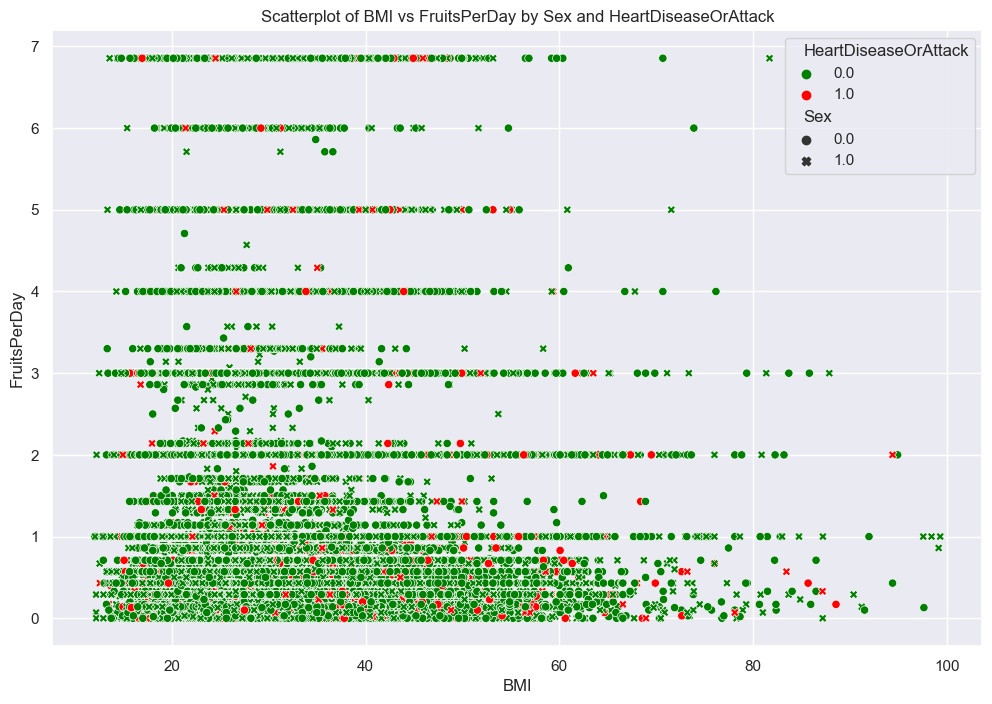

In [21]:
sns.scatterplot(data=df, x="BMI", y="FruitsPerDay", hue="HeartDiseaseOrAttack", style="Sex", palette=["green", "red"])

# Add labels and title
plt.xlabel("BMI")
plt.ylabel("FruitsPerDay")
plt.title("Scatterplot of BMI vs FruitsPerDay by Sex and HeartDiseaseOrAttack")

# Show the plot
plt.show()

C:\VSCode\Uni\COM618-DataScience\Practice\01-ReadDataSet\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


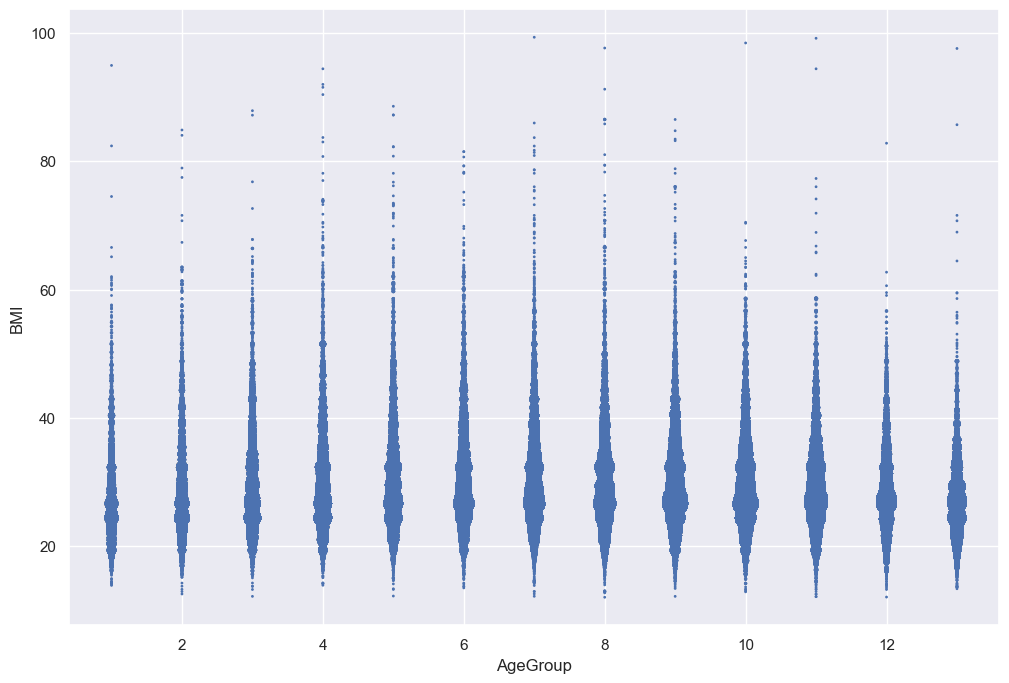

In [23]:
#BMI to Age

myCount = df.groupby(['AgeGroup', 'BMI'])['BMI'].transform('count')
df.plot.scatter(x='AgeGroup', y='BMI', s=myCount)

# show the plot
plt.show()

#Show no correlation between age group & BMI

In [15]:
#Principal Component Analysis, Clustering
# View